In [60]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("semua_transaksi_ch11.csv", index_col="TRX_ID")
data

,TRX_TS,PRODUCT_ID,PRODUCT_NAME,PRICE
TRX_ID,,,,
85,5/31/2017 21:06,226,Tuna Fish Sandwich,36000
85,5/31/2017 21:06,227,Club Sandwich + Free Coffee,44000
85,5/31/2017 21:06,233,Rawon,36000
85,5/31/2017 21:06,234,Soto Madura,48000
85,5/31/2017 21:06,263,Cappucino,32000
...,...,...,...,...
5082,10/12/2018 21:00,260,Espresso,18000
5082,10/12/2018 21:00,266,Cafe Latte + Hazelnut,35000
5082,10/12/2018 21:00,281,Es Teh,11000


In [3]:
data.describe()

,PRODUCT_ID,PRICE
count,16128.000000,16128.000000
mean,267.162822,25763.516865
std,34.558433,11440.502735
min,214.000000,5000.000000
25%,234.000000,18000.000000
50%,263.000000,28000.000000
75%,283.000000,33000.000000
max,420.000000,150000.000000


In [4]:
data["PRODUCT_NAME"].value_counts()

Es Teh                  1761
Air Mineral              951
Bakmi Godog Keju         917
Nasi Goreng Jawa         839
Bakmi Goreng Jawa        445
                        ... 
Roti Telur                 2
Nasi Tinoransak Sapi       1
Pisang Bakar Epe           1
Vegetable Kroket           1
Extra Maple                1
Name: PRODUCT_NAME, Length: 130, dtype: int64

In [5]:
data.drop(["PRODUCT_ID"], axis=1, inplace=True)

In [6]:
data["PRODUCT_NAME"].value_counts().sort_values(ascending=False)

Es Teh                  1761
Air Mineral              951
Bakmi Godog Keju         917
Nasi Goreng Jawa         839
Bakmi Goreng Jawa        445
                        ... 
Roti Telur                 2
Nasi Tinoransak Sapi       1
Pisang Bakar Epe           1
Vegetable Kroket           1
Extra Maple                1
Name: PRODUCT_NAME, Length: 130, dtype: int64

In [7]:
data.groupby("PRODUCT_NAME").sum()

,PRICE
PRODUCT_NAME,
A & W Root Beer,828000
A&W Root Beer & Vanila Float,1716000
Affogato (Ice Vanilla & Espresso),2492000
Air Mineral,7608000
Americano,8988000
...,...
Vanilla Milk Shake,1890000
Vegetable Kroket,26000
Vegetable Omelette,870000


In [8]:
data.sort_values(by=["PRICE"], ascending=False)

,TRX_TS,PRODUCT_NAME,PRICE
TRX_ID,,,
182,6/6/2017 22:36,XL Burger w/ Fries + Free Lemonade,150000
413,9/18/2017 22:07,XL Burger w/ Fries + Free Lemonade,150000
110,6/5/2017 13:53,XL Burger w/ Fries + Free Lemonade,150000
2196,2/11/2018 13:41,Steak Wagyu w/ Fries,124000
2338,2/21/2018 19:22,Steak Wagyu w/ Fries,124000
...,...,...,...
4718,9/10/2018 18:56,Extra Keju,5000
2179,2/10/2018 9:19,Extra Keju,5000
2050,1/29/2018 10:15,Extra Keju,5000


In [24]:
data.groupby("PRODUCT_NAME").sum().sort_values(by=["PRICE"], ascending=False)

,PRICE
PRODUCT_NAME,
Nasi Goreng Jawa,27687000
Bakmi Godog Keju,27510000
Es Teh,19371000
Bakmi Goreng Jawa,15130000
Soto Madura,14256000
...,...
Nasi Tinoransak Sapi,48000
Roti Telur,44000
Pisang Bakar Epe,28000


In [10]:
data.groupby("PRODUCT_NAME").sum()

,PRICE
PRODUCT_NAME,
A & W Root Beer,828000
A&W Root Beer & Vanila Float,1716000
Affogato (Ice Vanilla & Espresso),2492000
Air Mineral,7608000
Americano,8988000
...,...
Vanilla Milk Shake,1890000
Vegetable Kroket,26000
Vegetable Omelette,870000


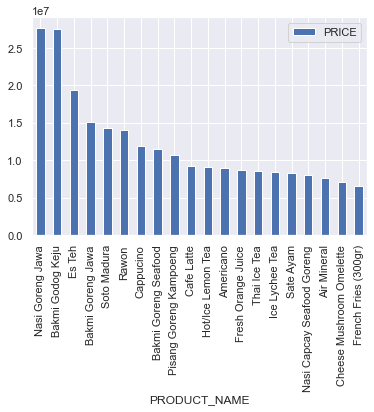

In [38]:
data.groupby("PRODUCT_NAME").sum().sort_values(by=["PRICE"], ascending=False).head(20).plot(kind="bar");

In [41]:
data_endcod = data.pivot_table(index="TRX_ID", columns="PRODUCT_NAME", values="PRICE").fillna(0)
data_endcod

PRODUCT_NAME,A & W Root Beer,A&W Root Beer & Vanila Float,Affogato (Ice Vanilla & Espresso),Air Mineral,Americano,Australian Milo (Hot/Ice),Bagelen Kedai Ina,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakmi Goreng Seafood,...,Toast Egg & Corned Beef,Toast Kaya (Srikaya),Toast Peanut (Kacang Gula Kelapa),Toast Special (peanut + choco + cheese),Tuna Fish Sandwich,Vanilla Milk Shake,Vegetable Kroket,Vegetable Omelette,Vietnamese Coffee,XL Burger w/ Fries + Free Lemonade
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,36000.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,0.0,0.0,0.0,8000.0,0.0,0.0,0.0,30000.0,34000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MENGGANTI SEMUA NILAI RUPIAH JADI 1 UNTUK MENGETAHUI BELI ATAU TIDAKNYA PELANGGAN

In [77]:
data_endcod[(data_endcod > 0)] = 1
data_endcod.index

Int64Index([  85,   86,   87,   88,   89,   90,   91,   92,   93,   94,
            ...
            5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082],
           dtype='int64', name='TRX_ID', length=4565)

In [82]:
data_endcod

PRODUCT_NAME,A & W Root Beer,A&W Root Beer & Vanila Float,Affogato (Ice Vanilla & Espresso),Air Mineral,Americano,Australian Milo (Hot/Ice),Bagelen Kedai Ina,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakmi Goreng Seafood,...,Toast Egg & Corned Beef,Toast Kaya (Srikaya),Toast Peanut (Kacang Gula Kelapa),Toast Special (peanut + choco + cheese),Tuna Fish Sandwich,Vanilla Milk Shake,Vegetable Kroket,Vegetable Omelette,Vietnamese Coffee,XL Burger w/ Fries + Free Lemonade
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
data_as = association_rules(data_apr, metric="lift", min_threshold=1)
data_as

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
